In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
#Yêu cầu 1: Sử dụng Pandas để đọc dữ liệu
df = pd.read_csv('Case_study_CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [6]:
#Yêu cầu 2: Phát hiện và sửa sai dữ liệu
#Tại cột doornumber và cylindernumber đang thuộc  kiểu dữ liệu là chuỗi và cần đưa về kiểu số 
df.replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}, inplace = True) #Thay đổi các giá trị two, four thành 2,4,... bằng replace
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [8]:
#Yêu cầu: Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định

In [9]:
#Dùng pairplot để mô tả các cặp biến định tính
#Lọc ra các cột có dtypes không phải là object 

In [10]:
#df1= df.select_dtypes(exclude='object')
#df1.drop('car_ID', axis=1, inplace = True)
#df1

In [11]:
#sns.pairplot(df1)

In [12]:
#Biến symboling với price
#plt.scatter(df['symboling'], df['price'])

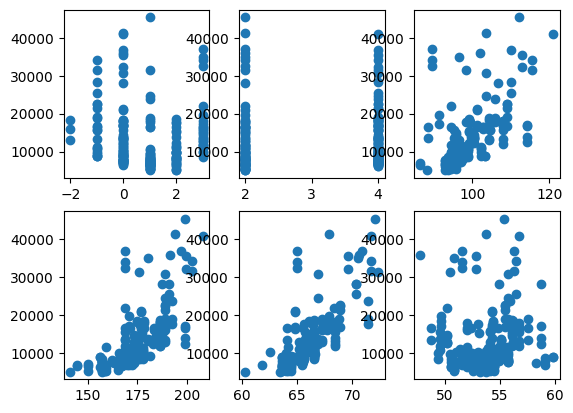

In [13]:
#Phân tích các biến định lượng với price
fig, ax = plt.subplots(2, 3)
ax[0][0].scatter(df['symboling'], df['price'])
ax[0][1].scatter(df['doornumber'], df['price'])
ax[0][2].scatter(df['wheelbase'], df['price'])
ax[1][0].scatter(df['carlength'], df['price'])
ax[1][1].scatter(df['carwidth'], df['price'])
ax[1][2].scatter(df['carheight'], df['price'])
plt.show()

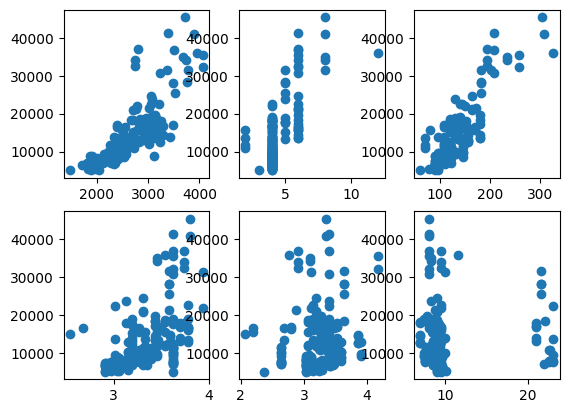

In [14]:
fig, ax = plt.subplots(2, 3)
ax[0][0].scatter(df['curbweight'], df['price'])
ax[0][1].scatter(df['cylindernumber'], df['price'])
ax[0][2].scatter(df['enginesize'], df['price'])
ax[1][0].scatter(df['boreratio'], df['price'])
ax[1][1].scatter(df['stroke'], df['price'])
ax[1][2].scatter(df['compressionratio'], df['price'])
plt.show()

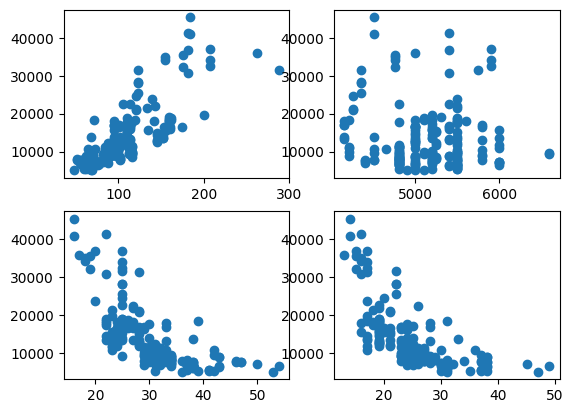

In [15]:
fig, ax = plt.subplots(2, 2)
ax[0][0].scatter(df['horsepower'], df['price'])
ax[0][1].scatter(df['peakrpm'], df['price'])
ax[1][0].scatter(df['highwaympg'], df['price'])
ax[1][1].scatter(df['citympg'], df['price'])
plt.show()

Nhận xét: 
1. Cặp symboling và price: cặp này không thấy có sự tương quan
2. Cặp doornumber và price: cặp này không có sự tương quan, vì số lượng cửa không ảnh hưởng gì đến giá bán của xe
3. Các cặp thuộc tính miêu tả về ngoại hình của xe ( carlegth, carwidth, carheight): các cặp này có sự tương quan thuận với price. Các giá trị của các
thuộc này càng lớn thì giá bán sẽ càng cao. Và từ biểu đồ ta nhận thấy rằng các giá trị đang tập trung ở khoảng giá là 10.000 đến 20.000 là chủ yếu
4. Cặp curbweight và price: cặp này vẫn giống như các thuộc tính trên, có sự tương quan thuận với price
5. Cặp cylindernumber và price: cặp không thấy có sự tương quan rõ ràng
6. Các cặp thuộc tính miêu tả về chỉ số động cơ (enginesize, boreratio, stroke, compressionratio): các thuộc tính enginesize, boreratio, stroke có sự tương quan thuận với price. Còn về thuộc tính cuối cùng là compressionratio thì không thấy được sự tương quan rõ ràng với price
7. Các cặp thuộc tính về hiệu suất của xe (horsepower, peakrpm, highwaympg, citympg): thuộc tính đầu tiên horsepower có sự tương quan thuận với price. Thuộc tính peakrpm thì không thấy được sự tương quan. Hai cặp thuộc tính cuối cùng lại có sự tương quan nghịch với price
8. Tổng kết: Ta có thể kết luận sơ bộ như sau đối với các thuộc tính về ngoại hình của xe, chỉ số động cơ sẽ có sự tương quan thuận với giá bán của xe, các thuộc tính này càng lớn thì giá xe sẽ cao. Còn về thuộc tính hiệu suất của xe thì ngược lại hai thuộc tính highwaympg và citympg có sự tương quan nghịch với giá bán của xe. Tuy nhiên có các thuộc tính ít có sự tương quan đối với giá bán của xe (symboling, doornumber, cylindernumber, peakrpm, compressionratio)

# Kiểm định mối tương quan giữa các thuộc tính định tính với price

In [16]:
#1: wheelbase và price:
stats.pearsonr(df['wheelbase'], df['price'])

PearsonRResult(statistic=0.5778155982921502, pvalue=1.1828204863376843e-19)

In [17]:
#Nhận xét: p_value < 0.05 nên ta có thể suy ra thuộc tính này có sự tương quan với price

In [18]:
#2: carlength và price:
stats.pearsonr(df['carlength'], df['price'])

PearsonRResult(statistic=0.682920015677962, pvalue=1.6787066240746824e-29)

In [19]:
#Nhận xét: p_value < 0.05 nên ta có thể suy ra thuộc tính này có sự tương quan với price

In [20]:
#3: carwidth và price:
stats.pearsonr(df['carwidth'], df['price'])

PearsonRResult(statistic=0.7593252997415115, pvalue=9.627437876119045e-40)

In [21]:
#Nhận xét: p_value < 0.05 nên ta có thể suy ra thuộc tính này có sự tương quan với price

In [22]:
#4: carheight và price:
stats.pearsonr(df['carheight'], df['price'])

PearsonRResult(statistic=0.11933622657049447, pvalue=0.08832832352274972)

In [23]:
#Nhận xét: p_value > 0.05. Thuộc tính này không có sự tương quan với price

In [24]:
#5: curbweight và price:
stats.pearsonr(df['curbweight'], df['price'])

PearsonRResult(statistic=0.8353048793372968, pvalue=1.2144448264030282e-54)

In [25]:
#Nhận xét: p_value < 0.05. Thuộc tính này có sự tương quan với price

In [26]:
#6: enginesize và price:
stats.pearsonr(df['enginesize'], df['price'])

PearsonRResult(statistic=0.8741448025245117, pvalue=1.3547637598649229e-65)

In [27]:
#Nhận xét: p_value < 0.05. Thuộc tính này có sự tương quan với price

In [28]:
#7: boreratio và price:
stats.pearsonr(df['boreratio'], df['price'])

PearsonRResult(statistic=0.5531732367984437, pvalue=7.90792227824885e-18)

In [29]:
#Nhận xét: p_value < 0.05. Thuộc tính này có sự tương quan với price

In [30]:
#8: stroke và price:
stats.pearsonr(df['stroke'], df['price'])

PearsonRResult(statistic=0.079443083881931, pvalue=0.2575137159090866)

In [31]:
#Nhận xét: p_value > 0.05. Thuộc tính này không có sự tương quan với price

In [32]:
#9: compressionratio và price:
stats.pearsonr(df['compressionratio'], df['price'])

PearsonRResult(statistic=0.06798350579944261, pvalue=0.332772361223806)

In [33]:
#Nhận xét: p_value > 0.05. Thuộc tính này không có sự tương quan với price

In [34]:
#10: horsepower và price:
stats.pearsonr(df['horsepower'], df['price'])

PearsonRResult(statistic=0.8081388225362216, pvalue=1.4834365732940867e-48)

In [35]:
#Nhận xét: p_value < 0.05. Thuộc tính này có sự tương quan với price

In [36]:
#11: peakrpm và price:
stats.pearsonr(df['peakrpm'], df['price'])

PearsonRResult(statistic=-0.08526715027785686, pvalue=0.22414123444666736)

In [37]:
#Nhận xét: p_value > 0.05. Thuộc tính này không có sự tương quan với price

# Kết luận: 
Dựa vào phép kiểm định mối tương quan, các thuộc tính sau đây có sự tương quan với price và gây ảnh hưởng đến giá bán của các dòng xe ô tô:
wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower

# Phân tích các biến định tính với price 

<Axes: xlabel='fueltype', ylabel='price'>

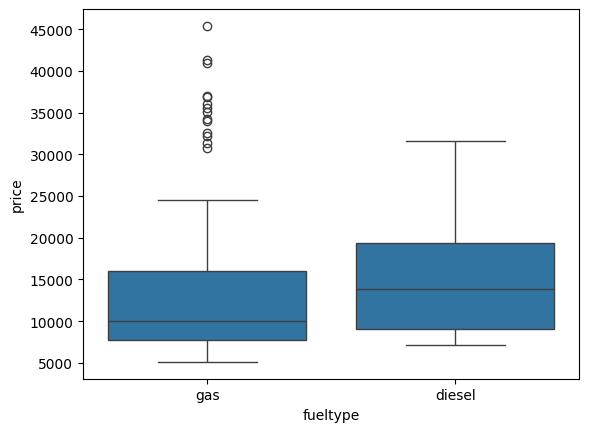

In [38]:
#1: fueltype
sns.boxplot(x='fueltype', y='price', data=df)

Nhận xét: Từ biểu đồ ta có thể thấy được giá bán của xe sử dụng nhiên liệu diesel có giá bán nhỉnh hơn với xe sử dụng gas. Tuy nhiên, từ biểu đồ ta cũng nhận thấy được xe sử dụng gas sẽ có các loại xe có giá bán cao hơn nhiều so với xe sử dụng nhiên liệu diesel

<Axes: xlabel='aspiration', ylabel='price'>

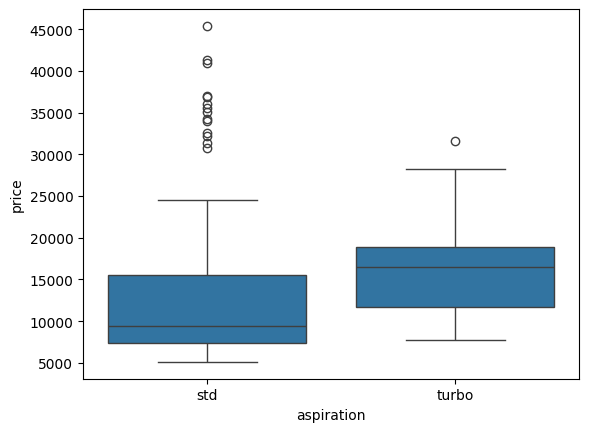

In [39]:
#2: aspiration
sns.boxplot(x='aspiration', y='price', data=df)

Nhận xét: Tương tự như với biểu đồ trên, giá bán của xe sử dụng quạt hút turbo sẽ có giá bán cao hơn. Nhưng xe sử dụng quạt hút std sẽ có các dòng xe có giá bán cao vượt trội hơn hẳn các dòng xe sử dụng turbo

<Axes: xlabel='carbody', ylabel='price'>

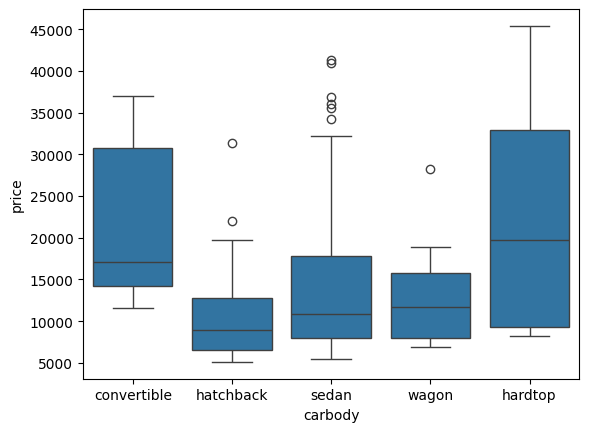

In [40]:
#3: carbody
sns.boxplot(x='carbody', y='price', data=df)

Nhận xét: Qua quan sát biểu đồ, ta thấy rằng hai dòng xe convertible và hardtop có giá bán cao hơn so với các dòng xe còn lại. Tuy nhiên ở dòng xe sedan lại có vài mẫu xe có giá bán vượt trội hơn hẳn các dòng xe còn lại

<Axes: xlabel='drivewheel', ylabel='price'>

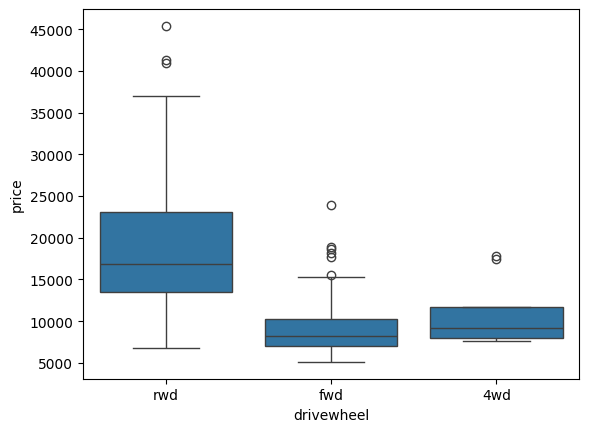

In [41]:
#4: drivewheel
sns.boxplot(x='drivewheel', y='price', data=df)

Nhận xét: Dựa vào biểu đồ trên, dòng xe rwd(Dẫn động cầu sau) có giá bán vượt trội hơn hẳn so với các dòng xe khác 

<Axes: xlabel='enginelocation', ylabel='price'>

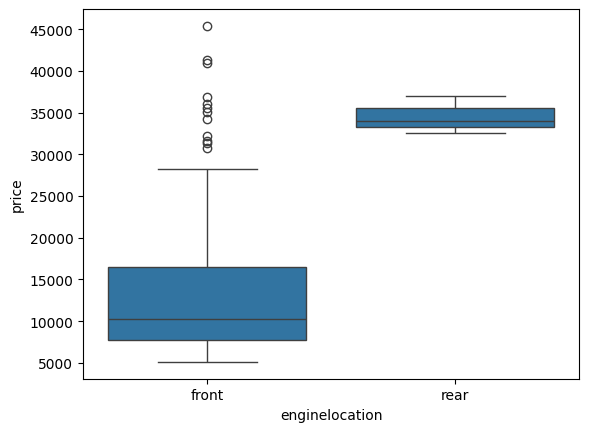

In [42]:
#5: enginelocation
sns.boxplot(x='enginelocation', y='price', data=df)

Nhận xét: Dòng xe có động cơ đặt phía sau(rear) sẽ có giá bán cao hơn so với xe có động cơ đặt phía trước 

<Axes: xlabel='enginetype', ylabel='price'>

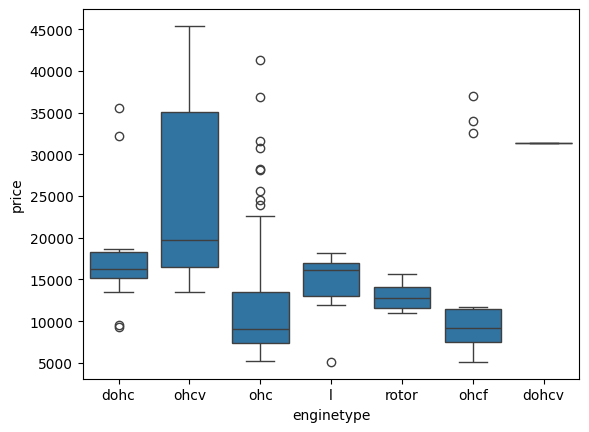

In [43]:
#6: enginetype
sns.boxplot(x='enginetype', y='price', data=df)

Nhận xét: Theo biểu đồ ta thấy dòng xe có loại động cơ ohcv sẽ có giá bán cao hơn và có phần nổi trội hơn các dòng xe khác

<Axes: xlabel='fuelsystem', ylabel='price'>

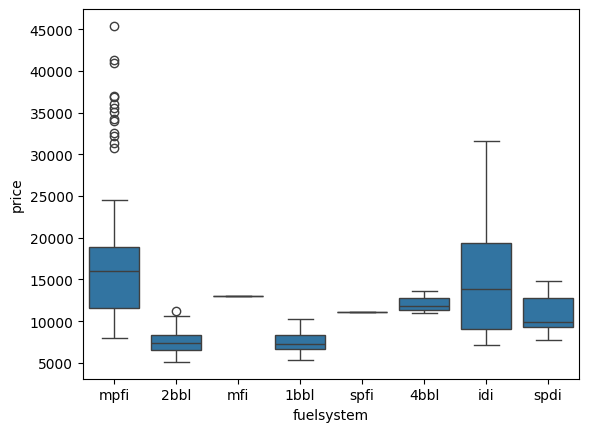

In [44]:
#7: fuelsystem
sns.boxplot(x='fuelsystem', y='price', data=df)

Nhận xét: Hai dòng xe có hệ thống nhiên liệu là mpfi và idi có giá bán nhỉnh hơn so với các dòng xe khác. Mặt khác dòng xe sử dụng hệ thống nhiên liệu mpfi có các mẫu xe có giá bán cao hơn, phân khúc giá lớn hơn so với các dòng xe khác


## Yêu cầu: Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét có những biến nào có tương quan lớn với nhau, chỉ giữ lại một trong các biến đó đưa vào mô hình)

<Axes: >

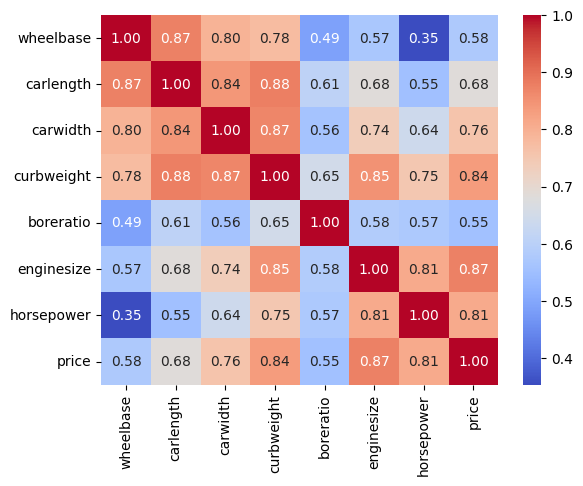

In [45]:
#Dựa theo biểu đồ phân tích các biến định lượng ở trên, ta sẽ lọc ra các thuộc tính có sự tương quan lớn nhất để đưa vào biểu đồ
df1 = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'boreratio', 'enginesize', 'horsepower', 'price']].corr()
df1
sns.heatmap(df1, annot=True, cmap='coolwarm', fmt=".2f")

# Nhận xét:
Dựa vào biểu đồ Heatmap ta nhận thấy rằng có ba thuộc tính có mức độ tương quan lớn với price đó là ba thuộc tính: enginesize, curbweight, horsepower. Trong đó enginesize có mức độ tương quan lớn nhất, lên tới 87% 

# Yêu cầu: Tiền hành mã hoá tạo ra các biến dummy từ các biến category 

In [46]:
df['Automaker']=df['CarName'].str.split(' ').str[0] #Tách cột CarName thành 1 cột mới có chứa hãng xe để dễ dàng mã hoá 
df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Automaker
158,159,0,toyota corona,diesel,std,4,sedan,fwd,front,95.7,...,idi,3.27,3.35,22.5,56,4500,34,36,7898.0,toyota
50,51,1,maxda rx3,gas,std,2,hatchback,fwd,front,93.1,...,2bbl,3.03,3.15,9.0,68,5000,30,31,5195.0,maxda
67,68,-1,buick electra 225 custom,diesel,turbo,4,sedan,rwd,front,110.0,...,idi,3.58,3.64,21.5,123,4350,22,25,25552.0,buick
188,189,2,volkswagen dasher,gas,std,4,sedan,fwd,front,97.3,...,mpfi,3.19,3.40,10.0,100,5500,26,32,9995.0,volkswagen
183,184,2,volkswagen 1131 deluxe sedan,gas,std,2,sedan,fwd,front,97.3,...,mpfi,3.19,3.40,9.0,85,5250,27,34,7975.0,volkswagen
104,105,3,nissan teana,gas,std,2,hatchback,rwd,front,91.3,...,mpfi,3.43,3.27,9.0,160,5200,19,25,17199.0,nissan
123,124,-1,plymouth valiant,gas,std,4,wagon,fwd,front,103.3,...,2bbl,3.35,3.46,8.5,88,5000,24,30,8921.0,plymouth
177,178,-1,toyota mark ii,gas,std,4,hatchback,fwd,front,102.4,...,mpfi,3.31,3.54,8.7,92,4200,27,32,11248.0,toyota
196,197,-2,volvo 244dl,gas,std,4,sedan,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0,volvo
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero


In [47]:
dummy = pd.get_dummies(df[['Automaker', 'fueltype', 'aspiration', 'carbody','drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']]).astype(int)
dummy.head()

,Automaker_Nissan,Automaker_alfa-romero,Automaker_audi,Automaker_bmw,Automaker_buick,Automaker_chevrolet,Automaker_dodge,Automaker_honda,Automaker_isuzu,Automaker_jaguar,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
df = pd.concat([df, dummy], axis=1) #Gộp các cột dummy vào bảng df
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,1,0,0


In [49]:
df = df.drop(['car_ID', 'CarName', 'Automaker', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], axis=1)
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [51]:
# Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là giá xe, các biến đầu vào là các trường còn lại.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
lr.coef_

array([-1.11734358e+02,  2.35433240e+01,  1.61118894e+02, -5.66697583e+01,
        5.59042029e+02, -2.73338103e+02,  4.46525102e+00, -5.35660391e+02,
        1.24699495e+02, -3.25216980e+03, -1.10329509e+03, -7.02819130e+02,
       -1.01827659e+01,  2.33850769e+00,  6.13552245e+01,  1.18341041e+02,
       -1.62819345e+03,  1.41323203e+03,  9.85113116e+02,  8.92006001e+03,
        6.19825228e+03, -2.69047043e+03, -2.68175372e+03,  1.69195625e+02,
       -6.33570532e+02,  9.33905434e+02, -6.87720715e+02,  1.85262331e+02,
       -2.33058017e-12, -3.65032739e+03, -9.06744290e+02, -5.98870346e+03,
       -3.23951714e+03,  1.71059988e+03,  3.17305931e+03, -2.19503455e+03,
        3.90732377e+03, -3.97014279e+03, -7.33333384e+02, -4.09272616e-12,
       -4.80871052e+02,  1.29213643e+02,  1.44957169e+03,  3.11593767e+02,
        2.75143837e+03, -2.75143837e+03, -9.41035005e+02,  9.41035005e+02,
        2.50432864e+03, -3.74281457e+02, -1.01262981e+03, -4.39024085e+02,
       -6.78393290e+02,  

In [53]:
lr.intercept_

-24296.820698891184

In [54]:
#Đánh giá kết quả mô hình
from sklearn import metrics
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1542.9149259614187
Mean Squared Error: 3497877.0310397604
Root Mean Squared Error: 1870.261220001035


In [55]:
#Mean Absolute Error: Trung bình giá xe mô hình đang dự đoán đang lệch với giá xe thật là 1542.9(nghìn đô)
#Root Mean Squared Error: Nếu đánh giá chặt chẽ hơn thì trung bình giá xe đang lệch với giá xe thật là 1870.2(nghìn đô)

In [58]:
#Đánh giá kết quả của mô hình hồi quy tuyến tính bằng statsAPI.OLS
import statsmodels.api as sm

In [59]:
X2 = sm.add_constant(X_train)
model_stats = sm.OLS(y_train.values.reshape(-1,1), X2).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     51.85
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           7.48e-57
Time:                        11:57:24   Log-Likelihood:                -1435.8
No. Observations:                 164   AIC:                             2990.
Df Residuals:                     105   BIC:                             3173.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6777.5520   5652.477     -1.199      0.233    -1.8e+04    4430.267
symboling              -111.7344    300.375     -0.372      0.711    -707.323     483.854
doornumber               23.5433    305.318      0.077      0.939    -581.846     628.933
wheelbase               161.1189    114.101      1.412      0.161     -65.122     387.360
carlength               -56.6698     63.922     -0.887      0.377    -183.416      70.076
carwidth                559.0420    272.107      2.054      0.042      19.504    1098.580
carheight              -273.3381    178.160     -1.534      0.128    -626.596      79.920
curbweight                4.4653      1.898      2.353      0.020       0.702       8.228
cylindernumber         -535.6604    783.465     -0.684      0.496   -2089.127    1017.806
enginesize              124.6995     28.128      4.433      0.000      68.927     180.472
boreratio             -3252.1698   2089.916     -1.556      0.123   -7396.088     891.748
stroke                -1103.2951   1378.967     -0.800      0.425   -3837.532    1630.942
compressionratio       -702.8191    548.132     -1.282      0.203   -1789.664     384.026
horsepower              -10.1828     25.759     -0.395      0.693     -61.258      40.892
peakrpm                   2.3385      0.769      3.040      0.003       0.813       3.864
citympg                  61.3552    166.707      0.368      0.714    -269.193     391.903
highwaympg              118.3410    156.045      0.758      0.450    -191.068     427.750
Automaker_Nissan      -1843.2173   2008.648     -0.918      0.361   -5825.996    2139.561
Automaker_alfa-romero  1198.2082   2689.223      0.446      0.657   -4134.023    6530.440
Automaker_audi          770.0893   1416.505      0.544      0.588   -2038.578    3578.757
Automaker_bmw          8705.0361   1259.271      6.913      0.000    6208.134    1.12e+04
Automaker_buick        5983.2284   1730.890      3.457      0.001    2551.193    9415.264
Automaker_chevrolet   -2905.4943   1533.535     -1.895      0.061   -5946.211     135.223
Automaker_dodge       -2896.7776   1011.622     -2.863      0.005   -4902.637    -890.918
Automaker_honda         -45.8282   1624.008     -0.028      0.978   -3265.935    3174.279
Automaker_isuzu        -848.5944   1343.693     -0.632      0.529   -3512.890    1815.701
Automaker_jaguar        718.8816   2099.833      0.342      0.733   -3444.699    4882.462
Automaker_maxda        -902.7446   1537.604     -0.587      0.558   -3951.529    2146.040
Automaker_mazda         -29.7615    955.233     -0.031      0.975   -1923.812    1864.289
Automaker_mercury     -2.363e-12   1.43e-12     -1.653      0.101    -5.2e-12    4.72e-13
Automaker_mitsubishi  -3865.3512   1012.296     -3.818      0.000   -5872.547   -1858.155
Automaker_nissan      -